In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sys
reload(sys)
sys.setdefaultencoding("utf-8")

In [2]:
Questions = np.array([
    '1. freie Öffnungszeiten',
    '2. Französisch an Grundschulen',
    "3. Tanzverbot an 'stillen Tagen'",
    '4. Integration von Ausländern',
    '5. keine weiteren Windkraftanlagen',
    '6. leichtere Volksbegehren',
    '7. bedingungsloses Grundeinkommen',
    '8. mehr Videoüberwachung',
    '9. G9',
    '10. Kommunalwahlrecht für Ausländer',
    '11. Senkung der Grunderwerbssteuer',
    '12. Adoptionsrecht für Homosexuelle',
    '13. Stärkung des saarbrückener Flughafens',
    '14. mehr Menschen mit Migrationsh. zur Polizei',
    '15. weniger Landkreise',
    '16. mehr Geld für Geisteswissenschaften',
    '17. Tunnel für Stadtautobahn',
    '18. christl. Symbole in öff. Gebäuden',
    '19. Frauenquote in Ministerien',
    '20, Bev. von Deutschen bei Sozialwohnungen',
    '21. Wahlalter senken',
    '22. gleiches Gehalt für Grundschullehrerinnen',
    '23. Ausnahmen von Abschiebung bei Härtefällen',
    '24. Buget für Jugendbeiräte',
    '25. weniger Datenschutz bei Verf. v. Straftaten',
    '26. Inklusion in Schulen',
    '27. Förderung v. Projekten gegen Rechtsextremismus',
    '28. Schwimmbäder durch Landesmittel',
    '29. kein islamischer Religionsunterricht',
    '30. ökologische Landwirtschaft soll bevorzugt werden',
    '31. kostenlose Kita ab 0 Jahren',
    '32. Gesundheitskarte für Flüchtlinge',
    '33. stärkere Kooperation von Hochschulen und Wirtschaft',
    '34. kein Gewerbe auf "Landschaft der Industriellen Kultur"',
    '35. Einschränkungen bei der Eröffnung von Bordellen',
    '36. weiterhin Kohlekraftwerke',
    '37. Cannabisanbau zum Eigenbedarf',
    '38. weiterhin 5%-Hürde bei Landtagswahlen'
])

In [3]:
Parteien = np.array(['CDU','SPD','Die Linke','Piraten','Die Grünen','Familien Part.','FDP','NPD','Freie Wähler','AfD','BGE','DBD',
           'DE','Reformer','LKR'])
BT = np.array(['Die Linke','Die Grünen','SPD','CDU'])
Wichtig = np.array(['FDP','NPD','AfD'])

Data = {
    'CDU':            [2,1,1,1,2,2,2,1,2,2,0,2,0,0,0,1,2,1,2,2,2,0,1,0,1,2,1,0,2,0,1,2,1,0,1,1,2,1],
    'SPD':            [2,1,1,1,2,2,2,1,1,1,2,1,1,1,2,0,0,1,1,2,1,1,1,1,1,1,1,1,2,0,1,1,1,2,1,1,2,1],
    'Die Linke':      [2,1,2,1,1,1,0,0,1,1,1,1,1,1,2,1,1,2,1,2,1,1,1,1,2,0,1,1,2,1,1,1,0,1,0,1,1,0],
    'Piraten':        [1,2,2,1,2,1,1,2,1,1,1,1,2,1,2,1,2,2,2,2,1,1,1,1,2,1,1,1,1,1,1,1,1,0,2,1,1,2],
    'Die Grünen':     [2,1,2,1,2,1,2,2,1,1,1,1,2,1,1,1,0,1,1,2,1,1,1,1,2,1,1,0,2,1,1,1,1,1,1,2,1,1],
    'Familien Part.': [2,1,1,1,1,1,0,1,1,2,0,2,2,0,2,0,2,1,2,0,1,0,2,0,2,2,1,2,0,0,1,0,1,2,2,1,2,2],
    'FDP':            [1,1,2,1,1,1,2,0,1,1,1,1,1,1,1,0,2,0,2,2,2,2,1,2,2,2,1,2,2,2,2,1,1,2,1,1,1,1],
    'NPD':            [1,2,1,2,0,1,1,1,1,2,1,2,1,2,2,1,2,1,2,1,1,1,2,0,2,2,2,1,1,1,1,2,1,0,1,1,2,2],
    'Freie Wähler':   [2,1,1,1,2,1,2,0,1,2,1,2,2,2,1,1,2,1,2,1,2,1,0,1,1,2,1,1,2,1,1,2,1,1,1,1,2,2],
    'AfD':            [2,2,1,0,1,1,2,1,1,2,1,2,1,2,1,1,2,2,2,2,2,2,2,2,1,2,1,1,1,1,2,2,1,2,2,1,2,1],
    'BGE':            [0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],
    'DBD':            [1,1,2,1,1,1,2,1,1,2,1,2,1,1,2,1,2,1,2,1,1,1,2,1,1,2,1,1,0,1,1,2,1,2,1,1,2,2],
    'DE':             [0,2,0,0,2,0,1,1,0,2,1,2,1,0,2,0,0,1,0,1,2,0,0,0,1,2,1,1,1,1,1,2,1,0,1,2,2,2],
    'Reformer':       [2,2,1,1,2,1,2,1,1,2,1,2,1,1,1,1,2,1,2,1,2,1,1,2,1,2,1,1,1,1,1,2,2,1,1,2,1,1],
    'LKR':            [2,2,1,1,1,1,2,1,1,2,1,2,2,2,1,2,2,1,2,2,2,2,2,2,1,0,1,0,1,1,0,0,1,2,2,1,2,1]
}

V = []
for p in Parteien:
    V.append(Data[p])
V = np.array(V)

V[V==2] = -1

NP,N = V.shape

norm = 1

font = {'fontname':'Century Gothic'}
Title = "Korrelation der Parteien zur Wahl des Saarländer Landtages 2017\nnach Wahl-O-Mat (in %)"
cmap = 'coolwarm'
fontsize = 15

In [4]:
#compute distances
D = np.zeros((NP,NP))
for i in xrange(NP):
    for j in xrange(NP):
        D[i,j] = np.linalg.norm(V[i]-V[j],norm)
maxD = 2. * N**(1./norm)
S = (maxD - D)/maxD

In [5]:
#kill diagonal of S
for i in xrange(NP):
    for j in xrange(NP):      
        if j == i:
            S[i,j] = np.nan

In [6]:
def projectPrinc(vec,axis):
    return np.dot(vec,Evec[:,axis])

In [7]:
#principal components
m = np.mean(V,axis=0)
Vm = V - m
#covariance matrix
Cov = np.cov(np.transpose(V))#np.dot(np.transpose(Vm), Vm)
#eigenvalues, eigenvectors
Eval, Evec = np.linalg.eigh(Cov)
#sorting
idx1 = Eval.argsort()[::-1]   
Eval = Eval[idx1]
Evec = Evec[:,idx1]
d_princ0 = projectPrinc(Vm,0)
d_princ1 = projectPrinc(Vm,1)

In [8]:
def party2D():
    for i in xrange(NP):
        x,y = d_princ0[i],d_princ1[i]
        partei = Parteien[i]
        fweight, fsize = 'normal',fontsize-8
        marker, markersize = 'o', 0.5*fontsize
        if partei in BT:
            fweight, fsize = 'bold',fontsize
            marker, markersize = 's', 0.8*fontsize
        elif partei in Wichtig:
            fweight, fsize = 'bold',fontsize-4
            marker, markersize = 's', 0.5*fontsize
        ax.plot(x,y,marker=marker,markersize=markersize,color='orangered')
        ax.text(x,y-0.2, partei, ha='center', va='top', color='black',
                fontsize=fsize,fontweight=fweight,**font)

In [9]:
def wahlergebnis():
    label = 'Nach Wahlergebnis\ngewichtetes Mittel'
    x,y=projectPrinc(ergebnis_mittel,0),projectPrinc(ergebnis_mittel,1)
    ax.plot(x,y,marker='*',markersize=15,markeredgecolor='blue',color='blue')
    ax.text(x,y-0.2, label, ha='center', va='top', color='white',
                fontsize=fontsize-4,**font)

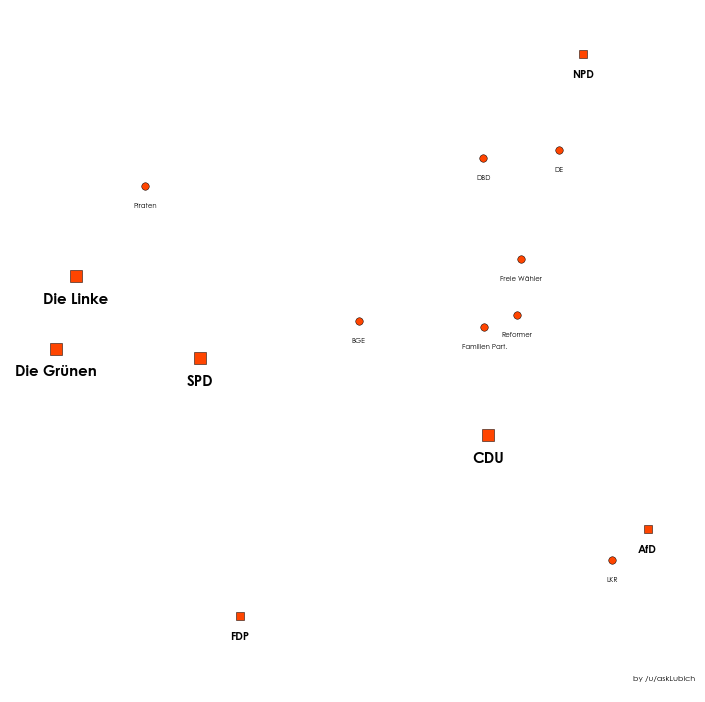

In [10]:
#2D plot
f, ax = plt.subplots(1, figsize=(12,12), dpi=300)
ax.axis('off')
f.patch.set_facecolor('white')
#ax.plot(d_princ0,d_princ1,'s',markersize=10,color='orangered')
party2D()
ax.set_xlim([-5,4])
ax.set_ylim([-4.5,4])
ax.text(4,-4.5, 'by /u/askLubich',color='black',ha='right', va='bottom',fontsize=8,**font)
f.show()
f.savefig('2Dprinc.png',bbox_inches='tight', dpi=300,facecolor=f.get_facecolor(), edgecolor='none')

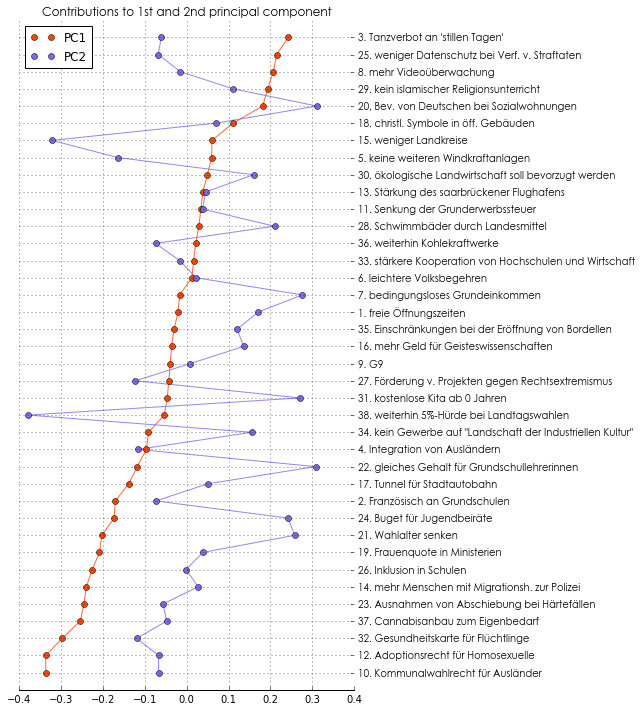

In [11]:
#show contribution to princ. components
QuestionNo = range(len(Questions))

f, ax = plt.subplots(1, figsize=(6,12), dpi=300)
#ax.axis('off')
f.patch.set_facecolor('white')

#sorting
ndx = Evec[:,0].argsort()[::-1]

#plotting
plt.plot(Evec[:,0][ndx],QuestionNo,color='orangered',alpha=0.8)
plt.plot(Evec[:,1][ndx],QuestionNo,color='mediumslateblue',alpha=0.8)
plt.plot(Evec[:,0][ndx],QuestionNo,'o',color='orangered',label='PC1')
plt.plot(Evec[:,1][ndx],QuestionNo,'o',color='mediumslateblue',label='PC2')
ax.yaxis.tick_right()
ax.set_ylim([-1,len(Questions)])
plt.gca().invert_yaxis()
plt.legend(loc='upper left')

#labels
ax.set_yticks(range(len(Questions)))
ax.set_yticklabels(Questions[ndx],**font)
ax.grid()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')

ax.set_title('Contributions to 1st and 2nd principal component',**font)

f.show()
f.savefig('princCont.png',bbox_inches='tight', dpi=300,facecolor=f.get_facecolor(), edgecolor='none')

In [12]:
len(Questions)

38

In [13]:
#sorting according to 1st principle axis
idx2 = d_princ0.argsort()
Parteien_sort = Parteien[idx2]
S_sort = S[idx2,:]
S_sort = S_sort[:,idx2]

In [14]:
def partylabel():
    for j in xrange(NP):
        partei = Parteien_sort[j]
        if partei in BT:
            fweight = 'bold'
        else:
            fweight = 'normal'
        #xlabels
        ax.text(j, -0.65, partei, ha='center', va='bottom', color='black',
                fontsize=fontsize,rotation=-90,fontweight=fweight,**font)
        ax.text(j, NP-0.35, partei, ha='center', va='top', color='black',
                fontsize=fontsize,rotation=90,fontweight=fweight,**font)
        #ylabels
        ax.text(-0.6, j, partei, ha='right', va='center', color='black',
                fontsize=fontsize,fontweight=fweight,**font)
        ax.text(NP-0.35, j, partei, ha='left', va='center', color='black',
                fontsize=fontsize,fontweight=fweight,**font)

In [15]:
def labels():
    for i in xrange(NP):
        for j in xrange(NP):
            if i!=j:
                ax.text(j, i, '%d' % round(S_sort[i,j]*100), ha='center',
                        va='center', color='white',fontsize=fontsize,**font)

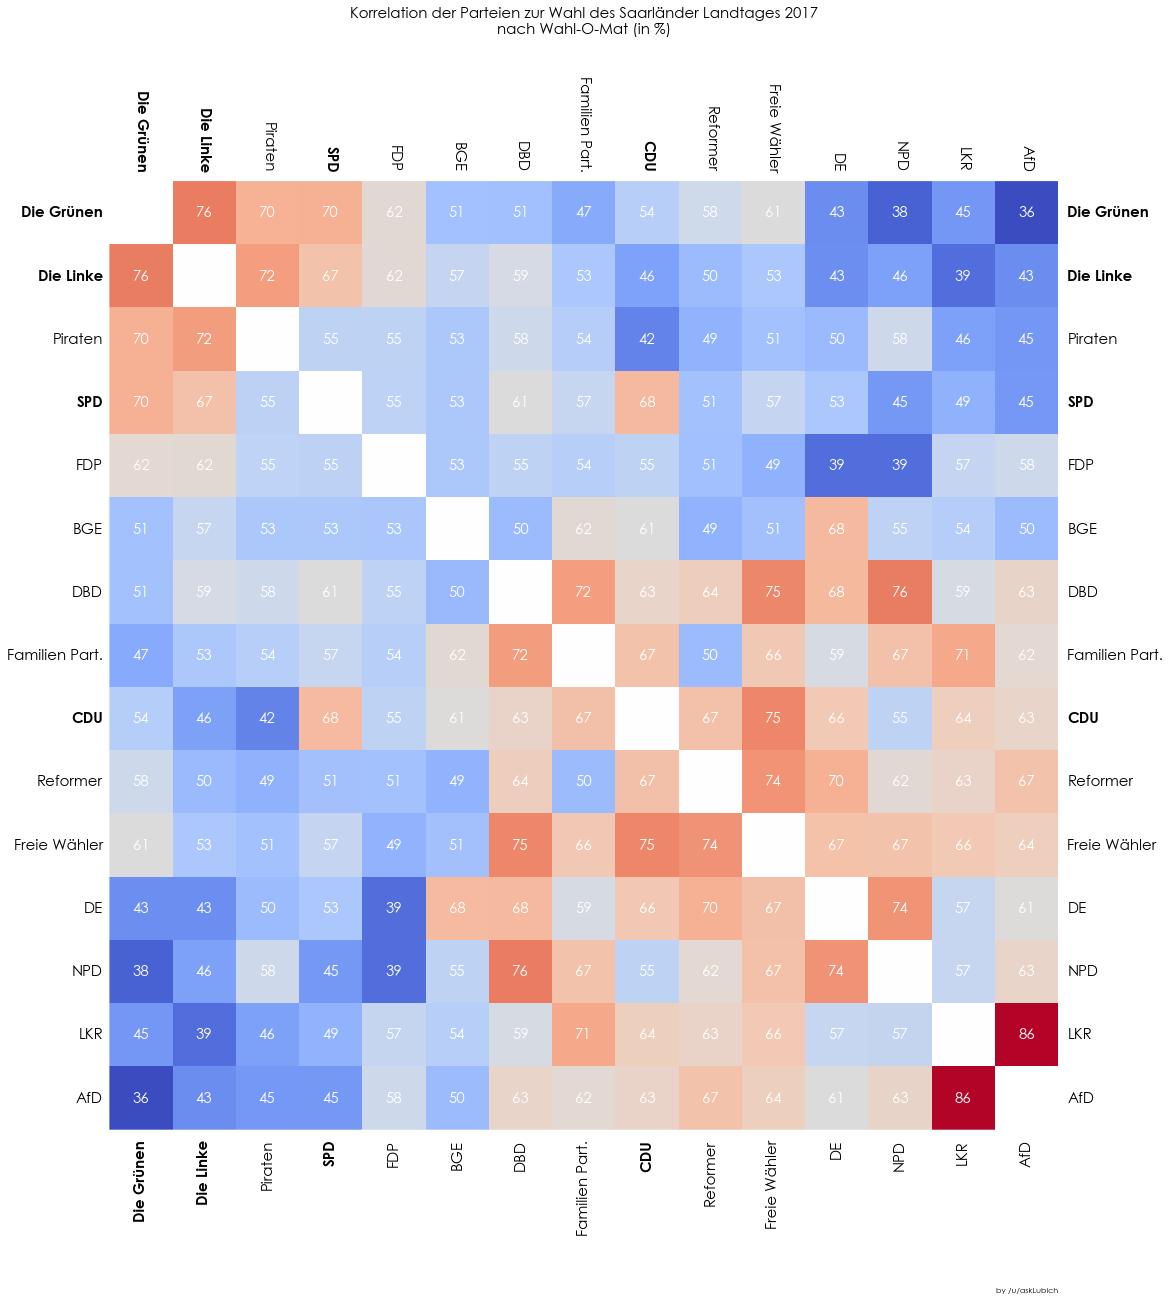

In [16]:
f, ax = plt.subplots(1, figsize=(17, 17), dpi=300, facecolor='white')
ax.imshow(S_sort,interpolation='none',cmap=cmap)#, vmin=0, vmax=1)
#plt.colorbar()
#plt.xticks(range(NP-1),Xticks)
#plt.yticks(range(NP-1),Yticks)
ax.axis('off')
partylabel()
labels()
ax.text(NP-0.5,NP+2, 'by /u/askLubich', ha='right', va='top',fontsize=8,**font)
ax.set_title(Title,position=(0.5,1.15),fontsize=fontsize,fontweight='normal',**font)
f.show()
f.savefig('wahlomat.png',bbox_inches='tight', dpi=500)

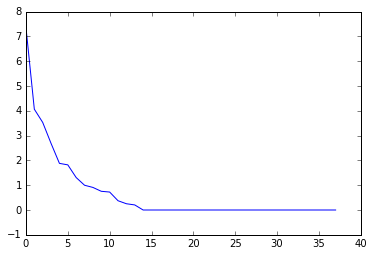

In [17]:
plt.plot(Eval)